### Importing Modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import skimage.io as io
from matplotlib.pyplot import figure
from numpy.linalg import inv

**Initially we collect 50 points from the river and 150 points from non-river from band4 as the training set.**

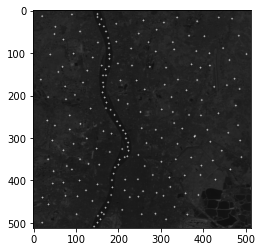

In [2]:
image = plt.imread('./img/annotated_band4_np_200.gif')
plt.imshow(image, cmap = 'gray')

##### First 50 data points are from river area and last 150 data points are from non river area.

### Step-1: Read the Data

In [3]:
band1 = pd.Series(io.imread('./img/band1.gif').flatten())
band2 = pd.Series(io.imread('./img/band2.gif').flatten())
band3 = pd.Series(io.imread('./img/band3.gif').flatten())
band4 = pd.Series(io.imread('./img/band4.gif').flatten())
img = pd.DataFrame({'band1': band1, 'band2': band2, 'band3': band3, 'band4': band4})
img

,band1,band2,band3,band4
0,41,27,26,42
1,41,27,29,41
2,38,25,26,40
3,38,23,21,39
4,37,23,22,39
...,...,...,...,...
262139,37,22,20,23
262140,37,23,19,23
262141,38,22,20,25
262142,38,23,19,31


In [4]:
river_nonRiver = pd.read_csv('./data/annotated_points_band4_np_200.csv')

In [5]:
river = pd.DataFrame(river_nonRiver.loc[0:49,:])
river['indx'] = river.row * river.column
river.shape

(50, 3)

In [6]:
non_river = pd.DataFrame(river_nonRiver.iloc[50:200,:])
non_river['indx'] = non_river.row * non_river.column

In [7]:
train_river_body = img.iloc[river.indx,:]
train_non_river_body = img.iloc[non_river.indx,:]

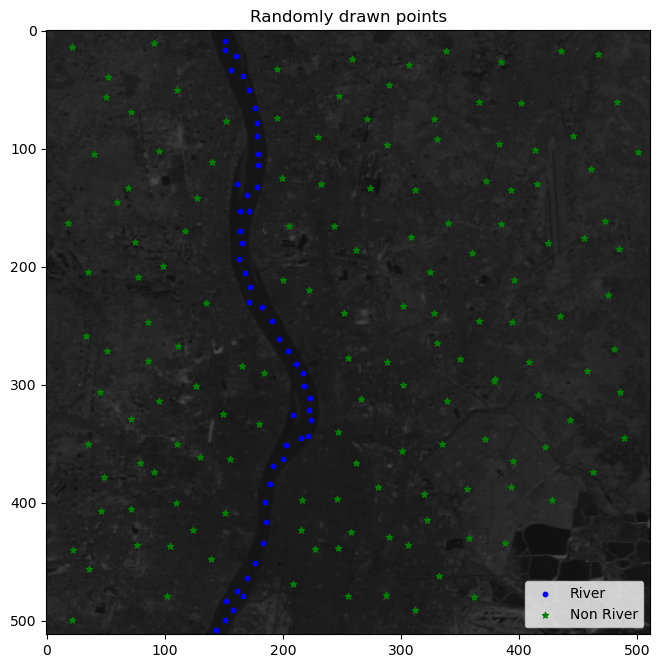

In [17]:
image = plt.imread('./img/band4.gif')
figure(figsize=(8, 8), dpi = 100)
plt.imshow(image)
plt.scatter(river.column, river.row, marker = 'o', color = 'blue', s = 10)
plt.scatter(non_river.column, non_river.row, marker = '*', color = 'green', s = 20)
plt.legend(['River', 'Non River'])
plt.title("Randomly drawn points")
# plt.savefig('./img/drawn_points.jpg')

### Step-2: Finding Mean Vector ($\mu$) and Dispersion Matrix ($\Sigma$)

In [9]:
mu_r = train_river_body.apply(np.mean)
mu_nr = train_non_river_body.apply(np.mean)
sigma_r = train_river_body.cov()
sigma_nr = train_non_river_body.cov()

### Step-3: Define Bayes Classifier and prediction function

In [10]:
# Defining CLASS CONDITIONAL PROBABILITY
def CCP(data, mean, sd):
    c = []
    x = data-mean
    # precision matrix
    pm = np.linalg.inv(sd)
    for i in range(len(data)):
        c.append((x.iloc[i,:].T) @np.array(pm) @np.array((x.iloc[i,:])))
    c = np.exp(0.5*np.array(c))
    cp = 1/np.sqrt(2*np.pi*np.linalg.det(sd))*np.array(c)
    return cp

In [11]:
def prediction(cpr, cpnr, priorr, priornr):
    pred = []
    # 0: River, 1: Non-River
    for i in range(len(cpr)):
        if priorr*cpr[i] >= priornr*cpnr[i]:
            pred.append(0)
        else:
            pred.append(1)
    pred_img = np.array(pred).reshape(512,512)
    return pred_img

### Step-4: Finding Class Conditional Probabilities

In [12]:
cpr = CCP(img, mu_r, sigma_r)
cpnr = CCP(img, mu_nr, sigma_nr)

### Step-5: Prediction

Text(0.5, 1.0, '$p_1 = 0.5, p_2 = 0.5$')

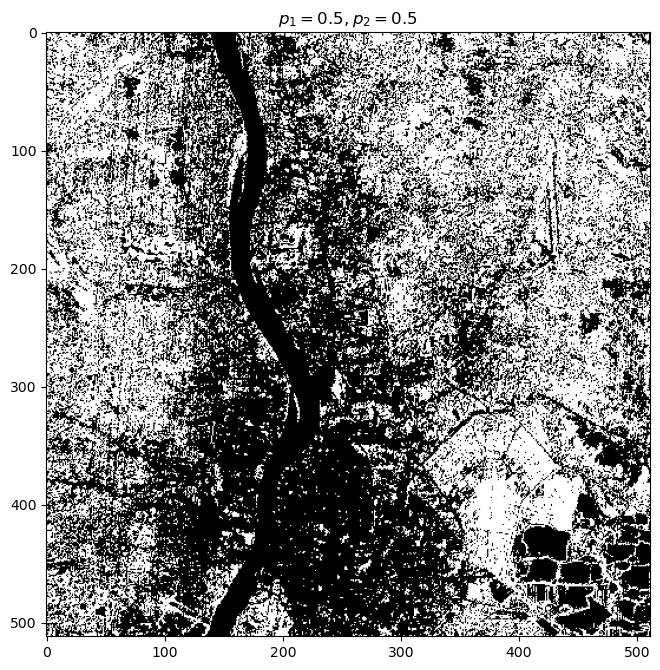

In [13]:
p1 = prediction(cpr, cpnr, 0.5, 0.5)
figure(figsize=(8, 8), dpi = 100)
plt.imshow(p1, cmap = 'gray')
plt.title("$p_1 = 0.5, p_2 = 0.5$")

Text(0.5, 1.0, '$p_1 = 0.8, p_2 = 0.2$')

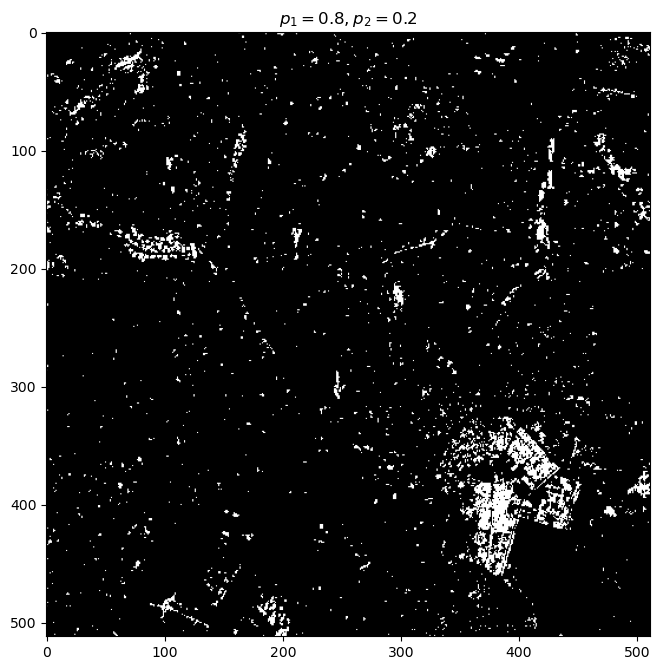

In [14]:
p2 = prediction(cpr, cpnr, 0.8, 0.2)
figure(figsize=(8, 8), dpi = 100)
plt.imshow(p2, cmap = 'gray')
plt.title("$p_1 = 0.8, p_2 = 0.2$")

Text(0.5, 1.0, '$p_1 = 0.2, p_2 = 0.8$')

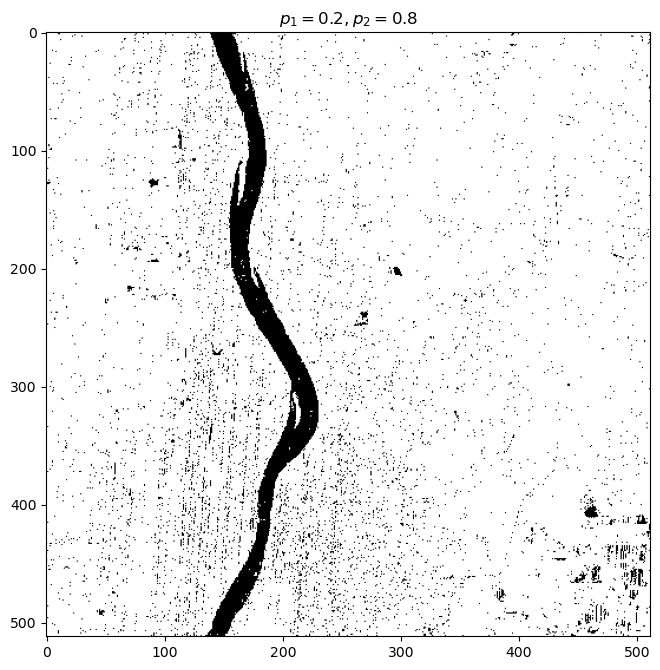

In [15]:
p3 = prediction(cpr, cpnr, 0.2, 0.8)
figure(figsize=(8, 8), dpi = 100)
plt.imshow(p3, cmap = 'gray')
plt.title("$p_1 = 0.2, p_2 = 0.8$")